In [103]:
# Import Dependencies:

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [105]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [106]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [107]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [108]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [109]:
# Save references to each table
Measurement  = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [111]:
#from sqlalchemy import inspect

# find out column name and datatype for measurement table
inspector = inspect(engine)
columns =inspector.get_columns("measurement")
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [112]:
# find out column name and datatype for station table
inspector = inspect(engine)
columns =inspector.get_columns("station")
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [113]:
# Get the data from Measurement table
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [114]:
# Get the data from Station table
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [115]:
# First date in dataset
session.query(Measurement.date).order_by(Measurement.date).first()


('2010-01-01',)

In [116]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [117]:
# Calculate the date one year from the last date in data set.
yearago_date = dt.date(2017,8,23) - dt.timedelta( days = 365)
print("Date One Year from the last date in data set : ", yearago_date)

Date One Year from the last date in data set :  2016-08-23


In [118]:
# Perform a query to retrieve the data and precipitation scores
data_prcp_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yearago_date).all()
data_prcp_score

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [119]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data_prcp_score).set_index('date')

# rename the column name
df = df.rename(columns = {'prcp': 'precipitation'})

df



,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [120]:
# # Sort the dataframe by date
date_df = df.sort_values(by ='date').dropna()
date_df
# date_df = df.sort_values(by ='Date')
# date_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


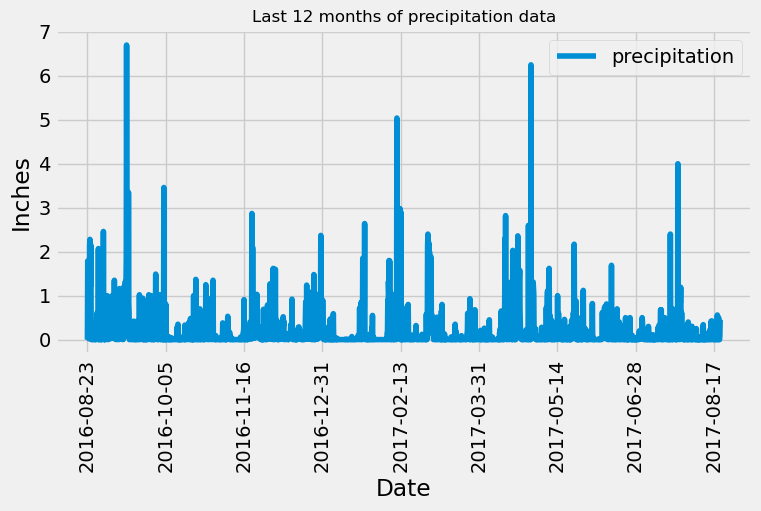

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#most_recent_date

# Calculate the date one year from the last date in data set.
yearago_date = dt.date(2017,8,23) - dt.timedelta( days = 365)

# Perform a query to retrieve the data and precipitation scores
data_prcp_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yearago_date).all()
#data_prcp_score

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data_prcp_score).set_index('date')

# rename the column name
df = df.rename(columns = {'prcp': 'precipitation'})

# Sort the dataframe by date
date_df = df.sort_values(by ='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(rot = 90, grid = True, figsize = (8,4))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Last 12 months of precipitation data", size = 12)
plt.show()


In [122]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [123]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [124]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [125]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temp = session.query(func.min(Measurement.tobs),\
                     func.max(Measurement.tobs),\
                     func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_station_temp

[(54.0, 85.0, 71.66378066378067)]

In [126]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data that filters by the station 
# that has the greatest number of observations

last_12months_temp_result = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= yearago_date).all()


In [127]:
# Save the query results to a Pandas DataFrame using variable
observation_df = pd.DataFrame(last_12months_temp_result, columns=['Date','tobs'])
observation_df.set_index('Date', inplace = True)
observation_df

,tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


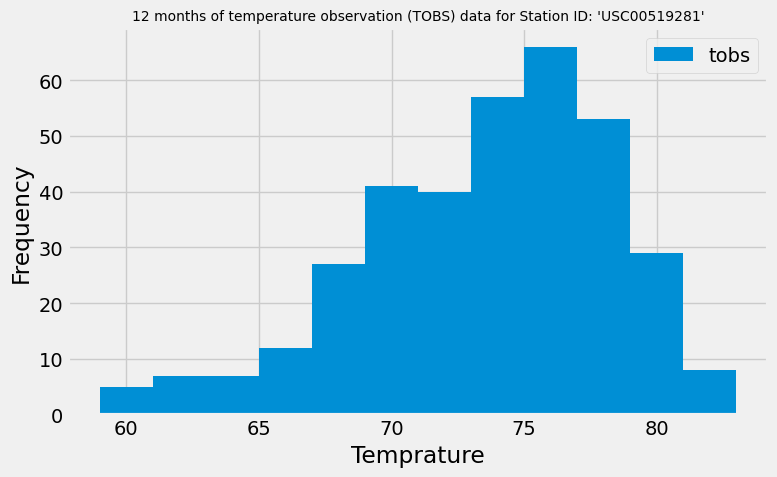

In [140]:
# Correctly plot a histogram with bins=12 for the last year of data using tobs as the column to count. 
observation_df.plot.hist(bins=12, figsize = (8,5))
plt.xlabel("Temprature")
plt.ylabel("Frequency")
plt.title("12 months of temperature observation (TOBS) data for Station ID: 'USC00519281'", size = 10)
plt.tight_layout()

# Close Session

In [129]:
# Close Session
session.close()